# Applying ML algorithms to predict Air Quality Index 

## 1.) Linear Regression Algorithm

In [2]:
# Importing Necessary Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Inserting the dataset

df = pd.read_csv('https://raw.githubusercontent.com/Jayrajsinh03/Air-Quality-Index-Prediction-/master/Data/New%20Folder/Real_Combine.csv')

In [4]:
df.head()

T    TM   Tm     SLP     H   VV    V    VM      PM 2.5
0   7.4   9.8  4.8  1017.6  93.0  0.5  4.3   9.4  219.720833
1   7.8  12.7  4.4  1018.5  87.0  0.6  4.4  11.1  182.187500
2   6.7  13.4  2.4  1019.4  82.0  0.6  4.8  11.1  154.037500
3   8.6  15.5  3.3  1018.7  72.0  0.8  8.1  20.6  223.208333
4  12.4  20.9  4.4  1017.3  61.0  1.3  8.7  22.2  200.645833

In [6]:
# Observing wether there is a null value in dataframe or not

df.isnull()

T     TM     Tm    SLP      H     VV      V     VM  PM 2.5
0     False  False  False  False  False  False  False  False   False
1     False  False  False  False  False  False  False  False   False
2     False  False  False  False  False  False  False  False   False
3     False  False  False  False  False  False  False  False   False
4     False  False  False  False  False  False  False  False   False
...     ...    ...    ...    ...    ...    ...    ...    ...     ...
1088  False  False  False  False  False  False  False  False   False
1089  False  False  False  False  False  False  False  False   False
1090  False  False  False  False  False  False  False  False   False
1091  False  False  False  False  False  False  False  False   False
1092  False  False  False  False  False  False  False  False   False

[1093 rows x 9 columns]

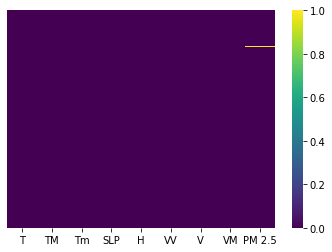

In [7]:
# Creating a heatmap to check null values in each label

sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [8]:
# Dropping the null values

df = df.dropna()

In [9]:
# Dividing dataset into dependent & independent features

x = df.iloc[:,:-1] ## independent features
y = df.iloc[:,-1] ## dependent features

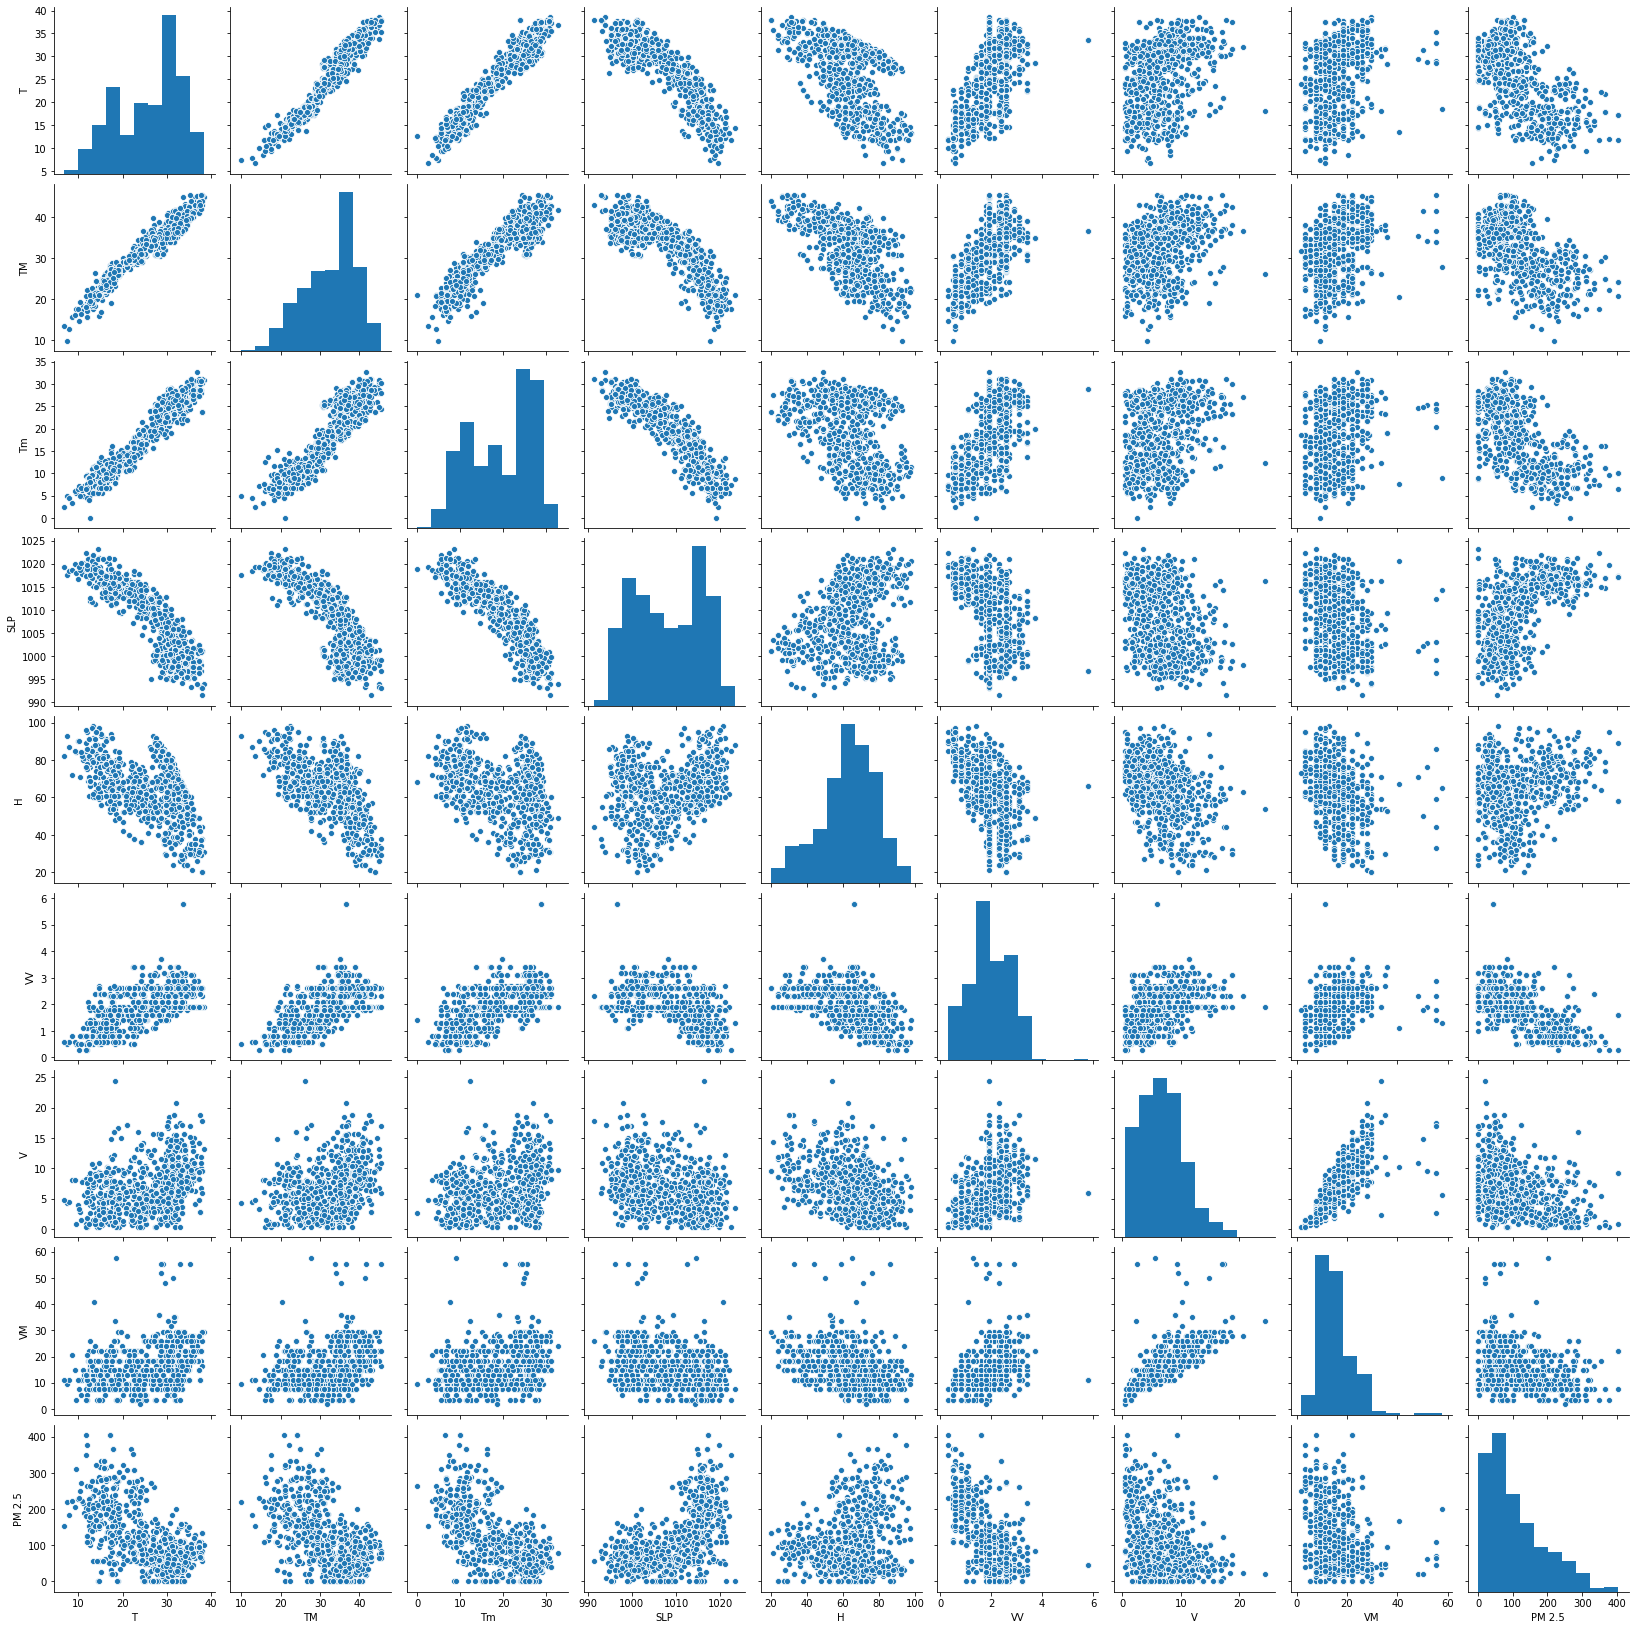

In [10]:
# Displaying multivariate graphs to understand the relations b/w features

sns.pairplot(df)

In [11]:
df.corr()

T        TM        Tm       SLP         H        VV         V  \
T       1.000000  0.967536  0.953719 -0.881409 -0.509299  0.640792  0.301994   
TM      0.967536  1.000000  0.892031 -0.822958 -0.586681  0.606945  0.292949   
Tm      0.953719  0.892031  1.000000 -0.917518 -0.287357  0.577240  0.296225   
SLP    -0.881409 -0.822958 -0.917518  1.000000  0.240256 -0.517915 -0.329838   
H      -0.509299 -0.586681 -0.287357  0.240256  1.000000 -0.465374 -0.380575   
VV      0.640792  0.606945  0.577240 -0.517915 -0.465374  1.000000  0.376873   
V       0.301994  0.292949  0.296225 -0.329838 -0.380575  0.376873  1.000000   
VM      0.287738  0.297011  0.266782 -0.310704 -0.362177  0.342442  0.775655   
PM 2.5 -0.631462 -0.568409 -0.673824  0.623187  0.138005 -0.573941 -0.268530   

              VM    PM 2.5  
T       0.287738 -0.631462  
TM      0.297011 -0.568409  
Tm      0.266782 -0.673824  
SLP    -0.310704  0.623187  
H      -0.362177  0.138005  
VV      0.342442 -0.573941  
V       0.775655 -0.268530  
VM      1.000000 -0.215854  
PM 2.5 -0.215854  1.000000

## Correlation Matrix with Heatmap

Correlation states how the features are related to each other or target variable. Heatmap makes it easy to identify the features that are the most related to the target variable. We will get better understanding of it after ploting the heatmap using seaborn library. 

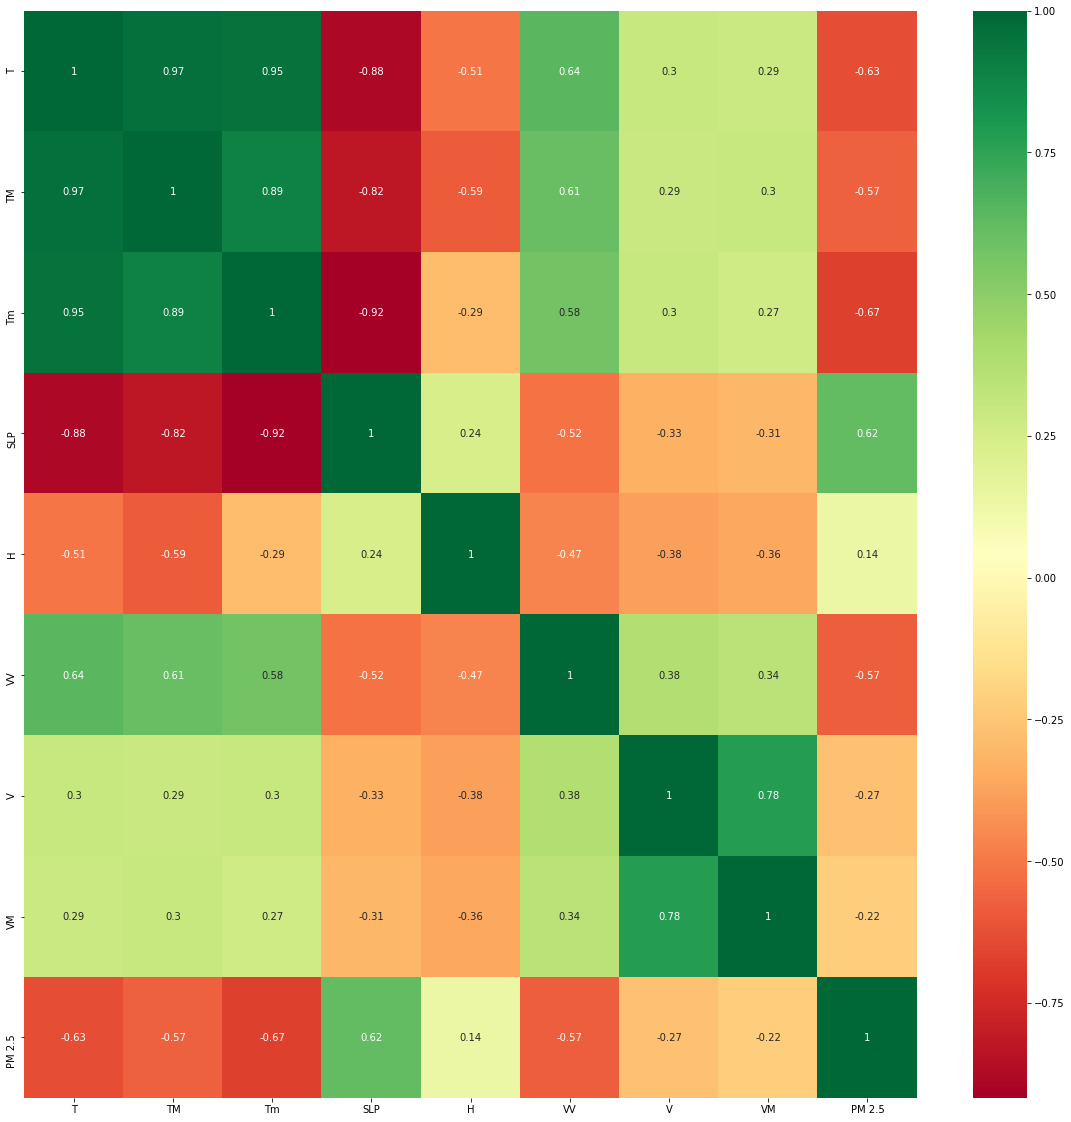

In [14]:
import seaborn as sns

#getting correlation of each features in dataset

cormat = df.corr()
top_corr_features = cormat.index
plt.figure(figsize=(20,20))

#plotting the heatmap

g = sns.heatmap(df[top_corr_features].corr(), annot=True, cmap = "RdYlGn")

### Feature Importance

You can get the feature importance of each feature of your dataset by using the feature importance property of the model.    
Feature importance gives you the score to the each feature of your data; the higher the score more important or relevant is the feature towards output variable.     
Feature importance is an inbuilt class that comes with Tree based Regressor which we wil be using Extra tree regressor fir extracting top 10 features of database. 

In [15]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(x,y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [16]:
# Getting Feature Importance Rating

print(model.feature_importances_)

[0.18331377 0.09358416 0.21496598 0.12936048 0.09088987 0.19326048
 0.05081995 0.04380529]


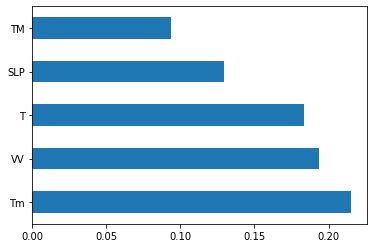

In [19]:
# Plotting the graph of feature importance Rating

feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

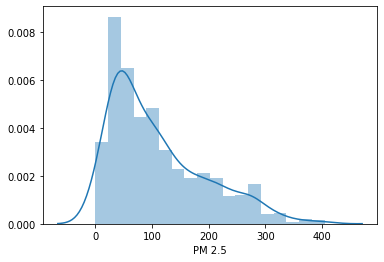

In [21]:
sns.distplot(y)

### Train - Test Split

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
print("Coefficient of determination R^2 <-- on train set: {}".format(regressor.score(X_train, Y_train)))

Coefficient of determination R^2 <-- on train set: 0.536075767556272


In [26]:
print("Coefficient of determination R^2 <-- on test set: {}".format(regressor.score(X_test, Y_test)))

Coefficient of determination R^2 <-- on test set: 0.5228951917854744


In [27]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(regressor,x,y,cv=5)

In [28]:
score.mean()

0.4710569304807392

**Model Evaluation**

In [29]:
coeff_df = pd.DataFrame(regressor.coef_, x.columns, columns = ['Coefficient'])
coeff_df

Coefficient
T      -2.101598
TM      0.208947
Tm     -4.245147
SLP    -0.030688
H      -1.187661
VV    -38.285342
V      -2.517344
VM      0.651836

### Interpreting the coefficients: 

* Holding all other feature fixed, one unit increase in T is associated with * decrease of 2.102 in AQI PM2.5*.
* Holding all other feature fixed, one unit increase in TM is associated with * increase of 0.209 in AQI PM2.5*.
* Holding all other feature fixed, one unit increase in Tm is associated with * decrease of 4.245 in AQI PM2.5*.
* Holding all other feature fixed, one unit increase in SLP is associated with * decrease of 0.031 in AQI PM2.5*.
* Holding all other feature fixed, one unit increase in H is associated with * decrease of 1.188 in AQI PM2.5*.
* Holding all other feature fixed, one unit increase in VV is associated with * decrease of 38.285 in AQI PM2.5*.
* Holding all other feature fixed, one unit increase in V is associated with * decrease of 2.517 in AQI PM2.5*.
* Holding all other feature fixed, one unit increase in VM is associated with * increase of 0.652 in AQI PM2.5*.

In [30]:
prediction = regressor.predict(X_test)

In [35]:
prediction

array([ 92.66155534, 196.72267875, 193.95997469,  62.9271248 ,
        63.33187009, 130.08177029, 184.561828  , 196.03869465,
        57.74270053, 219.24807028, 118.97388094,  78.14739515,
        19.50819865,  49.57700125, 100.25264825,  78.14739515,
       229.75213459, 181.25849752,  41.71215123, 185.61133161,
        19.89778669,  57.17751133,  61.90732781,  71.03926731,
       139.15101623,  68.98706244,  50.20582876,  73.52846829,
        13.60487021, 132.85460475,  93.43630833, 153.39381451,
       131.30660464,  88.6786629 ,  49.18870622,  68.06754583,
       218.6066943 , 104.0375577 , 104.16324723, 175.49596296,
        60.5112158 ,  60.72281604, 150.06090066,  96.91036645,
       121.14240985, 100.25264825,  55.47901158, 118.97388094,
        84.36010946,  45.36203507, 184.56076613,  74.44669904,
       232.77137702,  71.47424222, -96.21853423, -96.21853423,
       176.50083654,  92.95927259,  71.75506585,  44.67143368,
        64.51404028, 136.73720691,  11.37364406, 206.21

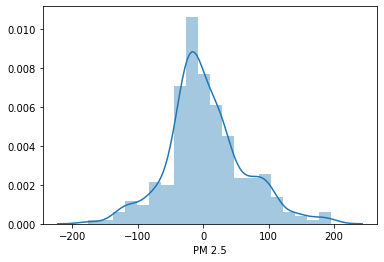

In [31]:
sns.distplot(Y_test-prediction)

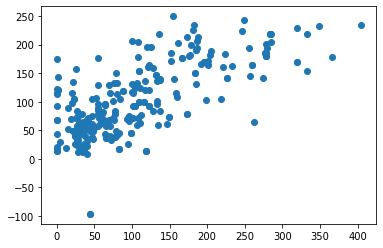

In [33]:
plt.scatter(Y_test,prediction)

# Regression Evaluation Metrics

In [45]:
from sklearn import metrics

In [46]:
print('MAE:', metrics.mean_absolute_error(Y_test, prediction))
print('MSE:', metrics.mean_squared_error(Y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, prediction)))

MAE: 44.34118150953593
MSE: 3533.389754513457
RMSE: 59.44232292326282


# 2.) Ridge Regression algorithm  

In [47]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [52]:
ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-5,1e-3,1e-2,1,5,10,20,30,40,50,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)
ridge_regressor.fit(x,y)

GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.001, 0.01, 1,
                                   5, 10, 20, 30, 40, 50, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [53]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 50}
-3662.351604927303


# 3.) Lasso Regression algorithm

In [54]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV


In [55]:
lasso = Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-5,1e-3,1e-2,1,5,10,20,30,40,50,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(x,y)

print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

C:\Users\Jordan\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1444197.3511959247, tolerance: 614.5592033746461
  positive)
C:\Users\Jordan\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1568739.7813254024, tolerance: 678.9710639134809
  positive)
C:\Users\Jordan\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1456481.2227170018, tolerance: 626.8737580831347
  positive)
C:\Users\Jordan\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Du

{'alpha': 1}
-3666.7832534370186


**Model Evaluation**

In [56]:
prediction = lasso_regressor.predict(X_test)

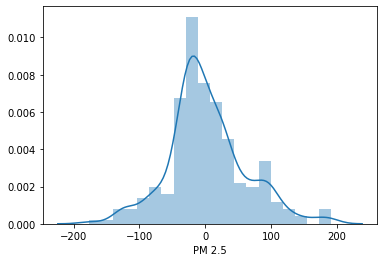

In [57]:
sns.distplot(Y_test-prediction)

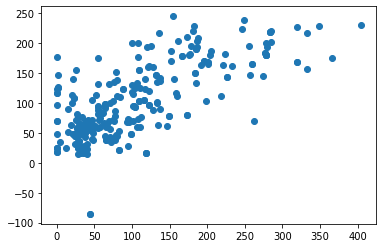

In [58]:
plt.scatter(Y_test, prediction)

In [59]:
from sklearn import metrics

In [60]:
print('MAE:', metrics.mean_absolute_error(Y_test, prediction))
print('MSE:', metrics.mean_squared_error(Y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, prediction)))

MAE: 44.179368294841325
MSE: 3504.292780581808
RMSE: 59.197067330922806


# 4.) Decision Tree Regressor Algorithm

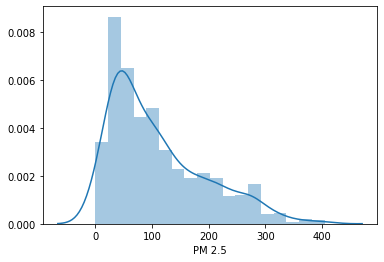

In [61]:
sns.distplot(y)

In [62]:
from sklearn.tree import DecisionTreeRegressor

In [63]:
dtree = DecisionTreeRegressor(criterion="mse")

In [64]:
dtree.fit(X_train, Y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [66]:
print("Coefficient of determination R^2 <-- on train set: {}".format(dtree.score(X_train, Y_train)))

Coefficient of determination R^2 <-- on train set: 1.0


In [67]:
print("Coefficient of determination R^2 <-- on test set: {}".format(dtree.score(X_test, Y_test)))

Coefficient of determination R^2 <-- on test set: 0.7581663478218429


Observing the Coefficient of test set and train set, we can say that it is a overfitting. 

In [69]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(dtree,x,y,cv=5)

In [70]:
score.mean()

0.45822411537880586

### Decision Tree Visualization

In [73]:
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydotplus

In [74]:
features = list(df.columns[:-1])
features

['T', 'TM', 'Tm', 'SLP', 'H', 'VV', 'V', 'VM']

In [75]:
### Setting path in an environment for graphviz

import os

os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

In [76]:
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data, feature_names = features, filled = True, rounded = True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.929534 to fit



In [77]:
prediction=dtree.predict(X_test)

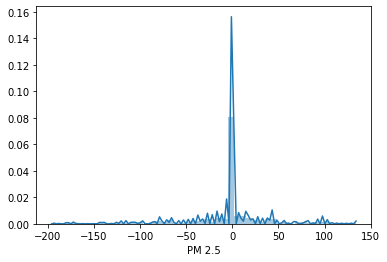

In [78]:
sns.distplot(Y_test-prediction)

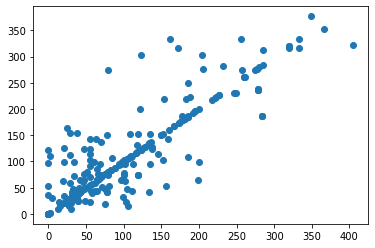

In [79]:
plt.scatter(Y_test, prediction)

### Hyperparameter Tuning Decision Tree Regressor

In [80]:
DecisionTreeRegressor()

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [81]:
## Hyper Parameter Optimization

params= {
    "splitter"     :  ["best","random"],
    "max_depth"    :  [3,4,5,6,8,10,12,15],
    "min_samples_leaf"    :  [1,2,3,4,5],
    "min_weight_fraction_leaf"     :  [0.1,0.2,0.3,0.4],
    "max_features"     :  ["auto","log2","sqrt",None ],
    "max_leaf_nodes"   :  [None,10,20,30,40,50,60,70]
    
}

In [82]:
## Hyperparameter optimization using GridSearchCV

from sklearn.model_selection import GridSearchCV

In [84]:
random_search = GridSearchCV(dtree,param_grid = params, scoring = 'neg_mean_squared_error',n_jobs=-1,cv=10,verbose=3)

In [85]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [87]:
from datetime import datetime
# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(x,y)
timer(start_time) # timing ends here for "start_time" variable

Fitting 10 folds for each of 10240 candidates, totalling 102400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 3852 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done 14092 tasks      | elapsed:   22.3s
[Parallel(n_jobs=-1)]: Done 28428 tasks      | elapsed:   42.3s
[Parallel(n_jobs=-1)]: Done 46860 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 69388 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 96012 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 102400 out of 102400 | elapsed:  2.4min finished



 Time taken: 0 hours 2 minutes and 23.55 seconds.


In [88]:
random_search.best_params_

{'max_depth': 15,
 'max_features': 'auto',
 'max_leaf_nodes': 70,
 'min_samples_leaf': 5,
 'min_weight_fraction_leaf': 0.1,
 'splitter': 'best'}

In [89]:
random_search.best_score_

-3131.6489619178874

In [90]:

predictions=random_search.predict(X_test)

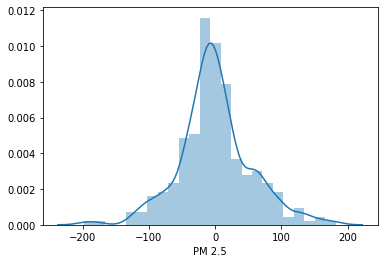

In [92]:
sns.distplot(Y_test-predictions)

In [94]:
print('MAE:', metrics.mean_absolute_error(Y_test, predictions))
print('MSE:', metrics.mean_squared_error(Y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, predictions)))

MAE: 39.957782960137706
MSE: 3019.2737378217125
RMSE: 54.94791841209012


In [95]:
from sklearn import metrics

In [96]:
print('MAE:', metrics.mean_absolute_error(Y_test, prediction))
print('MSE:', metrics.mean_squared_error(Y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, prediction)))

MAE: 22.11256105006105
MSE: 1790.9954672237488
RMSE: 42.32015438563225


# 5.) Random Forest Regressor Algorithm 

In [97]:
from sklearn.ensemble import RandomForestRegressor

In [98]:
regressor=RandomForestRegressor()
regressor.fit(X_train,Y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [99]:
print("Coefficient of determination R^2 <-- on train set: {}".format(regressor.score(X_train, Y_train)))

Coefficient of determination R^2 <-- on train set: 0.974865557271158


In [100]:
print("Coefficient of determination R^2 <-- on test set: {}".format(regressor.score(X_test, Y_test)))

Coefficient of determination R^2 <-- on test set: 0.8225173391281007


In [101]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(regressor,x,y,cv=5)

In [102]:
score.mean()

0.7194546295541671

**Model Evaluation**

In [103]:
prediction = regressor.predict(X_test)

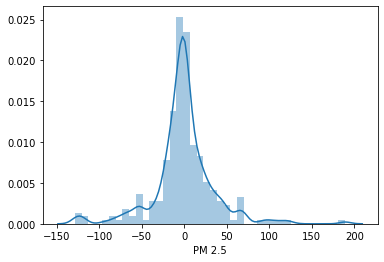

In [104]:
sns.distplot(Y_test-prediction)

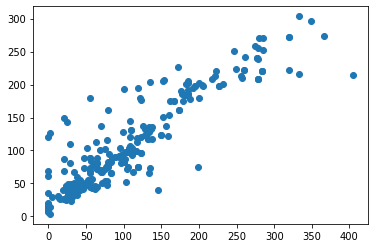

In [105]:
plt.scatter(Y_test, prediction)

### Hyperparameter Tuning

In [106]:
RandomForestRegressor()

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [107]:
from sklearn.model_selection import RandomizedSearchCV

In [108]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]

# Number of features to consider at every split
max_features = ['auto','sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5,30, num =6)]

# max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2,5,10,15,100]

# Minimum number of samples required at each leaf node
min_samples_leaf=[1,2,5,10]

# Method of selecting samples for training each tree

# bootstrap = [True, False]


In [109]:
# Create the random grid

random_grid = { 'n_estimators' : n_estimators,
                'max_features' : max_features,
                'max_depth' : max_depth,
                'min_samples_split' : min_samples_split,
                'min_samples_leaf' : min_samples_leaf}
               
print(random_grid)
    


{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [110]:
# Use the random grid to search for the best hyperparameters

# First create the base model to tune

rf = RandomForestRegressor()

In [111]:
# Random seach of parameters, using 3 fold cross validation,
# search across 100 differnet combinations

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, scoring = 'neg_mean_squared_error', n_iter = 100, cv=5, verbose = 2, random_state = 42, n_jobs = 1)

In [112]:
rf_random.fit(X_train, Y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   1.1s
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s


[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   1.0s
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   1.1s
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   1.1s
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   1.1s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=20 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=20, total=   1.3s
[CV] n_estimators=200, min_samples_spl

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed: 18.1min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [113]:
rf_random.best_params_

{'n_estimators': 500,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 15}

In [114]:
rf_random.best_score_

-1473.300931354928

**Model Evaluation**

In [115]:
predictions=rf_random.predict(X_test)

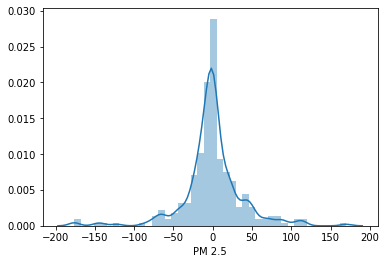

In [117]:
sns.distplot(Y_test-predictions)


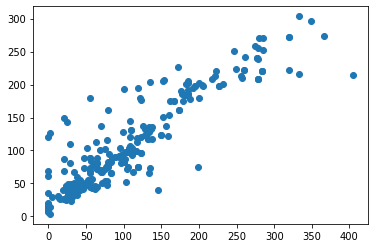

In [119]:
plt.scatter(Y_test,prediction)

# Regression Evaluation Metrics

In [121]:
from sklearn import metrics

In [123]:

print('MAE:', metrics.mean_absolute_error(Y_test, prediction))
print('MSE:', metrics.mean_squared_error(Y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, prediction)))

MAE: 22.600184676434683
MSE: 1314.418561144702
RMSE: 36.25491085556138


# 6.) XGBoost Regressor Algorithm

In [125]:
import xgboost as xgb

In [127]:
regressor = xgb.XGBRegressor()
regressor.fit(X_train, Y_train)

[12:12:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [128]:
print("Coefficient of determination R^2 <-- on train set: {}".format(regressor.score(X_train, Y_train)))

Coefficient of determination R^2 <-- on train set: 0.856492457223862


In [129]:
print("Coefficient of determination R^2 <-- on test set: {}".format(regressor.score(X_test, Y_test)))

Coefficient of determination R^2 <-- on test set: 0.757514179313912


In [130]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(regressor, x, y, cv = 5)

[12:14:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:14:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:14:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:14:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:14:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [131]:
score.mean()

0.6582827367763413

**Model Evaluation**

In [132]:
prediction = regressor.predict(X_test)

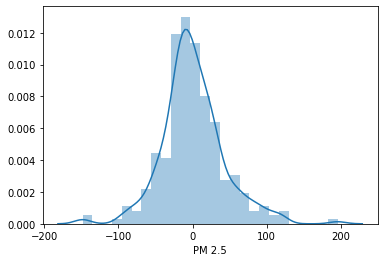

In [133]:
sns.distplot(Y_test-prediction)

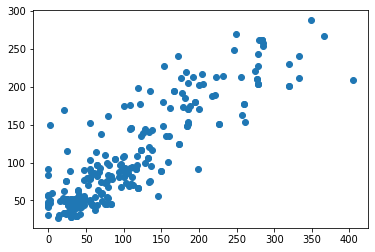

In [134]:
plt.scatter(Y_test, prediction)

### Hyperparameter Tuning

In [135]:
xgb.XGBRegressor()

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [136]:
from sklearn.model_selection import RandomizedSearchCV

In [137]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [138]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Various learning rate parameters
learning_rate = ['0.05','0.1', '0.2','0.3','0.5','0.6']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
#Subssample parameter values
subsample=[0.7,0.6,0.8]
# Minimum child weight parameters
min_child_weight=[3,4,5,6,7]

In [139]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'learning_rate': learning_rate,
               'max_depth': max_depth,
               'subsample': subsample,
               'min_child_weight': min_child_weight}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'learning_rate': ['0.05', '0.1', '0.2', '0.3', '0.5', '0.6'], 'max_depth': [5, 10, 15, 20, 25, 30], 'subsample': [0.7, 0.6, 0.8], 'min_child_weight': [3, 4, 5, 6, 7]}


In [140]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
regressor=xgb.XGBRegressor()

In [141]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
xg_random = RandomizedSearchCV(estimator = regressor, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [143]:
xg_random.fit(X_train,Y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] subsample=0.7, n_estimators=1100, min_child_weight=6, max_depth=10, learning_rate=0.3 
[12:19:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  subsample=0.7, n_estimators=1100, min_child_weight=6, max_depth=10, learning_rate=0.3, total=   1.3s
[CV] subsample=0.7, n_estimators=1100, min_child_weight=6, max_depth=10, learning_rate=0.3 
[12:19:32] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s


[CV]  subsample=0.7, n_estimators=1100, min_child_weight=6, max_depth=10, learning_rate=0.3, total=   1.0s
[CV] subsample=0.7, n_estimators=1100, min_child_weight=6, max_depth=10, learning_rate=0.3 
[12:19:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.7, n_estimators=1100, min_child_weight=6, max_depth=10, learning_rate=0.3, total=   1.0s
[CV] subsample=0.7, n_estimators=1100, min_child_weight=6, max_depth=10, learning_rate=0.3 
[12:19:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.7, n_estimators=1100, min_child_weight=6, max_depth=10, learning_rate=0.3, total=   1.5s
[CV] subsample=0.7, n_estimators=1100, min_child_weight=6, max_depth=10, learning_rate=0.3 
[12:19:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.7, n_estimators=1100, min_child_weigh

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:  8.1min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          objective='reg:linear',
                                          random_state=0, reg_alpha=...
                   param_distributions={'learning_rate': ['0.05', '0.1', '0.2',
                                                          '0.3', '0.5', '0.6'],
                            

In [144]:
xg_random.best_params_

{'subsample': 0.6,
 'n_estimators': 800,
 'min_child_weight': 3,
 'max_depth': 30,
 'learning_rate': '0.1'}

In [145]:
xg_random.best_params_

{'subsample': 0.6,
 'n_estimators': 800,
 'min_child_weight': 3,
 'max_depth': 30,
 'learning_rate': '0.1'}

In [146]:
xg_random.best_score_

-1330.570164182656

In [147]:
predictions=xg_random.predict(X_test)

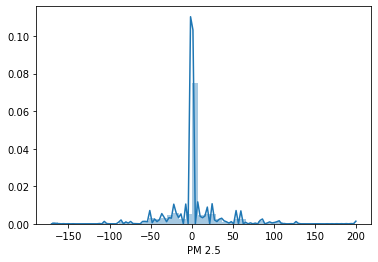

In [149]:

sns.distplot(Y_test-predictions)

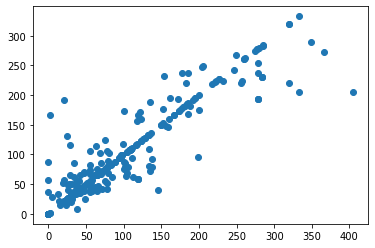

In [151]:
plt.scatter(Y_test,predictions)

# Regression Evaluation Metrics

In [152]:
from sklearn import metrics

In [154]:

print('MAE:', metrics.mean_absolute_error(Y_test, prediction))
print('MSE:', metrics.mean_squared_error(Y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, prediction)))

MAE: 30.701223471225838
MSE: 1795.825360958761
RMSE: 42.37717971926354
